<a href="https://colab.research.google.com/github/kingca12/Capstone/blob/master/PythonCode_WHOdataLifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-0.8720562078546198

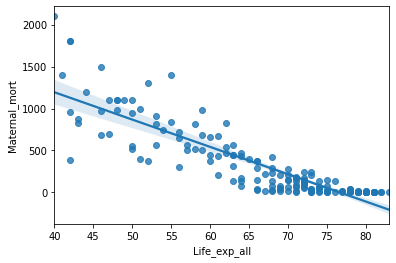

In [ ]:
#IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

#Datasets
WHO = pd.read_csv('https://raw.githubusercontent.com/kingca12/Capstone/master/WHO%20data.csv')
regions = pd.read_csv('https://raw.githubusercontent.com/kingca12/Capstone/master/Regions.csv')
#Merge datasets
WHOdata=pd.merge(WHO, regions)
WHOdata


#DATA EXPLORATION AND CLEANING
WHOdata.describe()
WHOdata.head()
WHOdata.dtypes

#Variables of interest
  #Country
  #Population
  #Income Group
  #WHO_Regio
  #Democracy_score
  #Female_labour_force
  #Inequality_index
  #Population median age (years)

  #Population living below the poverty line (% living on &lt; US$1 per day)

  #Life expectancy at birth (years) both sexes
  #Life expectancy at birth (years) female
  #Life expectancy at birth (years) male
  #Maternal mortality ratio (per 100 000 live births)

  #Literacy_rate_adult_female
  #Literacy_rate_adult_male
  #Literacy_rate_adult_total
  #Literacy_rate_youth_female
  #Literacy_rate_youth_male
  #Literacy_rate_youth_total
  #Net primary school enrolment ratio female (%)
  #Net primary school enrolment ratio male (%)

WHOdata.rename(columns={'Population living below the poverty line (% living on &lt; US$1 per day)':'Pop_below_pov_line', 'Population median age (years)': 'Pop_median_age', 'WHO_Regio':'WHO_Region', 
                        'Net primary school enrolment ratio male (%)': 'males_primary_school','Net primary school enrolment ratio female (%)': 'females_primary_school', 
                        'Life expectancy at birth (years) both sexes':'Life_exp_all', 'Life expectancy at birth (years) male':'Life_exp_male',
                        'Life expectancy at birth (years) female':'Life_exp_female', "Maternal mortality ratio (per 100 000 live births)":"Maternal_mort", "Income Group":"Income_Group"}, inplace=True)

WHOdata2=WHOdata[['Country','Population','Income_Group', 'WHO_Region','Democracy_score','Female_labour_force', 'Inequality_index', 
                 'Pop_median_age', 'Pop_below_pov_line', 
                  'Life_exp_all','Life_exp_male', 'Life_exp_female',
                  'Maternal_mort', 'Literacy_rate_adult_female', 'Literacy_rate_adult_male',
                  'Literacy_rate_adult_total', 'Literacy_rate_youth_female', 'Literacy_rate_youth_male', 'Literacy_rate_youth_total', 
                  'females_primary_school', 'males_primary_school'
                  ]]


#DATA EXPLORATION
WHOdata2.dtypes
WHOdata2.describe()
Byregion=pd.pivot_table(data=WHOdata2,index=['WHO_Region']) 
Byregion
WHOdata2.groupby(['WHO_Region'])['Life_exp_all'].median().plot(kind='bar')
WHOdata2.groupby(['WHO_Region'])['Life_exp_female'].count().plot(kind='bar')
WHOdata2.groupby(['WHO_Region'])['Life_exp_male'].median().plot(kind='bar')
WHOdata2.groupby(['Income_Group'])['Life_exp_all'].median().plot(kind='bar')


#DATA ANALYSIS/RESEARCH QUESTIONS
  #1 Are life expectancy and maternal mortality rate correlated?
sns.regplot(x='Life_exp_all', y='Maternal_mort', data=WHOdata2) #very strong correlation between life exp/maternal mortality
WHOdata2.Life_exp_all.corr(WHOdata2.Maternal_mort)
  
  
  #2 - Does poverty/inequality/democracy predict life expectancy?
sns.regplot(x='Pop_below_pov_line', y='Life_exp_all', data=WHOdata2)
WHOdata2.Pop_below_pov_line.corr(WHOdata2.Life_exp_all) #moderate/strong correlation between life expectancy and pop below poverty line

sns.regplot(x='Life_exp_all', y='Inequality_index', data=WHOdata2)
WHOdata2.Life_exp_all.corr(WHOdata2.Inequality_index) #weak correlation between life expectancy and inequality index

sns.regplot(x='Life_exp_all', y='Democracy_score', data=WHOdata2)
WHOdata2.Life_exp_all.corr(WHOdata2.Democracy_score) #weak/no correlation between life expectancy and democracy score

sns.relplot(x="Life_exp_all", y='Pop_below_pov_line', col="WHO_Region", kind="scatter", data=WHOdata2) #by region

WHOdata3=WHOdata2.dropna(axis=0, subset=['Pop_below_pov_line', 'Life_exp_all'])
model = sm.OLS(WHOdata3.Life_exp_all, sm.add_constant(WHOdata3.Pop_below_pov_line))
result = model.fit()
print(result.summary())

 
  #3 Does female education/literacy predict education/literacy/workforce?
sns.regplot(x='females_primary_school', y='Female_labour_force', data=WHOdata2)
WHOdata2.females_primary_school.corr(WHOdata2.Female_labour_force) #weak/no correlation between female primary school attendance and female labour force

sns.regplot(x='Literacy_rate_youth_female', y='Literacy_rate_adult_female', data=WHOdata2)
WHOdata2.Literacy_rate_youth_female.corr(WHOdata2.Literacy_rate_adult_female) #very strong correlation between female youth literacy and female adult literacy
  
sns.regplot(x='Literacy_rate_youth_female', y='Female_labour_force', data=WHOdata2)
WHOdata2.Literacy_rate_youth_female.corr(WHOdata2.Female_labour_force) #weak correlation between female youth literacy and female labour force
  
sns.regplot(x='Literacy_rate_adult_female', y='Female_labour_force', data=WHOdata2)
WHOdata2.Literacy_rate_adult_female.corr(WHOdata2.Female_labour_force) #weak/no correlation between female adult literacy and female labour force


  #4 Does female education/literacy/female workforce predict maternal mortality rate?
sns.regplot(x='Literacy_rate_adult_female', y='Maternal_mort', data=WHOdata2) #strong correlation between adult female literacy and maternal mortality
WHOdata2.Literacy_rate_adult_female.corr(WHOdata2.Maternal_mort)

sns.regplot(x='Literacy_rate_adult_male', y='Maternal_mort', data=WHOdata2)
WHOdata2.Literacy_rate_adult_male.corr(WHOdata2.Maternal_mort) #strong correlation between adult male literacy and maternal mortality

sns.regplot(x='Literacy_rate_adult_total', y='Maternal_mort', data=WHOdata2)
WHOdata2.Literacy_rate_adult_total.corr(WHOdata2.Maternal_mort) #strong correlation between adult literacy and maternal mortality

sns.regplot(x='females_primary_school', y='Maternal_mort', data=WHOdata2)
WHOdata2.females_primary_school.corr(WHOdata2.Maternal_mort) #strong correlation 

sns.regplot(x='Female_labour_force', y='Maternal_mort', data=WHOdata2)
WHOdata2.Female_labour_force.corr(WHOdata2.Maternal_mort) #weak/no correlation between female labour force and maternal mortality

sns.relplot(x="Maternal_mort", y='Literacy_rate_adult_female',
                 col="WHO_Region",
                 kind="scatter", data=WHOdata2)
sns.relplot(x="Maternal_mort", y='Literacy_rate_adult_male',
                 col="WHO_Region",
                 kind="scatter", data=WHOdata2)
sns.relplot(x="Maternal_mort", y='Literacy_rate_adult_total',
                 col="WHO_Region",
                 kind="scatter", data=WHOdata2)

sns.relplot(x="Life_exp_female", y='Literacy_rate_adult_female',
                 col="WHO_Region",
                 kind="scatter", data=WHOdata2)
sns.relplot(x="Life_exp_male", y='Literacy_rate_adult_male',
                 col="WHO_Region",
                 kind="scatter", data=WHOdata2)
sns.relplot(x="Life_exp_all", y='Literacy_rate_adult_total',
                 col="WHO_Region",
                 kind="scatter", data=WHOdata2)

WHOdata4=WHOdata2.dropna(axis=0, subset=['Maternal_mort', 'Literacy_rate_adult_total'])
model = sm.OLS(WHOdata4.Maternal_mort, sm.add_constant(WHOdata4.Literacy_rate_adult_total))
result = model.fit()
print(result.summary()) #Significant correlation between Adult Literacy rate and Life expectancy

WHOdata5=WHOdata2.dropna(axis=0, subset=['Literacy_rate_adult_total', 'Maternal_mort'])
model = sm.OLS(WHOdata5.Maternal_mort, sm.add_constant(WHOdata5.Literacy_rate_adult_total))
result = model.fit()
print(result.summary()) #Significant correlation between Adult Literacy rate and maternal mortality

WHOdata6=WHOdata2.dropna(axis=0, subset=['Maternal_mort', 'Female_labour_force'])
model = sm.OLS(WHOdata6.Maternal_mort, sm.add_constant(WHOdata6.Female_labour_force))
result = model.fit()
print(result.summary()) #No significant correlation between female labour force and maternal mortality


#5 Does democracy predict education/literacy?
sns.relplot(x='Literacy_rate_adult_female', y='Income_Group', data=WHOdata2)
sns.relplot(x='Literacy_rate_adult_male', y='Income_Group', data=WHOdata2)
sns.relplot(x='Literacy_rate_adult_total', y='Income_Group', data=WHOdata2)

sns.regplot(x='Literacy_rate_adult_female', y='Democracy_score', data=WHOdata2)
WHOdata2.Literacy_rate_adult_male.corr(WHOdata2.Democracy_score) #weak/no correlation between literacy and democ score
sns.regplot(x='Literacy_rate_adult_male', y='Democracy_score', data=WHOdata2)
WHOdata2.Literacy_rate_adult_female.corr(WHOdata2.Democracy_score) #weak/no correlation between literacy and democ score
sns.regplot(x='Literacy_rate_adult_total', y='Democracy_score', data=WHOdata2)
WHOdata2.Literacy_rate_adult_total.corr(WHOdata2.Democracy_score) #weak/no correlation between literacy and democ score

sns.relplot(x='Literacy_rate_adult_female', y='WHO_Region', data=WHOdata2)
sns.relplot(x='Literacy_rate_adult_male', y='WHO_Region', data=WHOdata2)
sns.relplot(x='Literacy_rate_adult_total', y='WHO_Region', data=WHOdata2)

sns.relplot(x='Maternal_mort', y='WHO_Region', data=WHOdata2)
sns.relplot(x='Pop_below_pov_line', y='WHO_Region', data=WHOdata2)
sns.relplot(x='Democracy_score', y='WHO_Region', data=WHOdata2)



In [ ]:
#EXPORT DATASET
WHO = pd.read_csv('https://raw.githubusercontent.com/kingca12/Capstone/master/WHO%20data.csv')
regions = pd.read_csv('https://raw.githubusercontent.com/kingca12/Capstone/master/Regions.csv')
WHOdata=pd.merge(WHO, regions)
WHOdata
WHOdata.rename(columns={'Population living below the poverty line (% living on &lt; US$1 per day)':'Pop_below_pov_line', 'Population median age (years)': 'Pop_median_age', 'WHO_Regio':'WHO_Region', 'Net primary school enrolment ratio male (%)': 'males_primary_school',
                         'Net primary school enrolment ratio female (%)': 'females_primary_school', 'Life expectancy at birth (years) both sexes':'Life_exp_all', 'Life expectancy at birth (years) male':'Life_exp_male',
                         'Life expectancy at birth (years) female':'Life_exp_female', "Maternal mortality ratio (per 100 000 live births)":"Maternal_mort", "Income Group":"Income_Group"}, inplace=True)

WHOdata2=WHOdata[['Country','Population','Income_Group', 'WHO_Region','Democracy_score','Female_labour_force', 'Inequality_index', 
                 'Pop_median_age', 'Pop_below_pov_line', 
                  'Life_exp_all','Life_exp_male', 'Life_exp_female',
                  'Maternal_mort', 'Literacy_rate_adult_female', 'Literacy_rate_adult_male',
                  'Literacy_rate_adult_total', 'Literacy_rate_youth_female', 'Literacy_rate_youth_male', 'Literacy_rate_youth_total', 
                  'females_primary_school', 'males_primary_school'
                  ]]
                  
from google.colab import drive
drive.mount('drive')
WHOdata2.to_csv('WHOdata2.csv')
!cp WHOdata2.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
